# 概要

- Niño 3 SST Indexのデータのウェーブレットパワースペクトルを可視化していく。
- [PyCWT](../PyCWT/try_pycwt.ipynb)のライブラリでも機能的に等価な可視化を行っている。

In [7]:
import pywt

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
time, sst = pywt.data.nino()

In [10]:
dt = time[1] - time[0]

In [11]:
wavelet = "cmor"
scales = np.arange(1, 128)

In [12]:
cfs, frequencies = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

In [13]:
period = 1. / frequencies

In [14]:
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]

In [15]:
f, ax = plt.subplots(figsize=(15, 10))

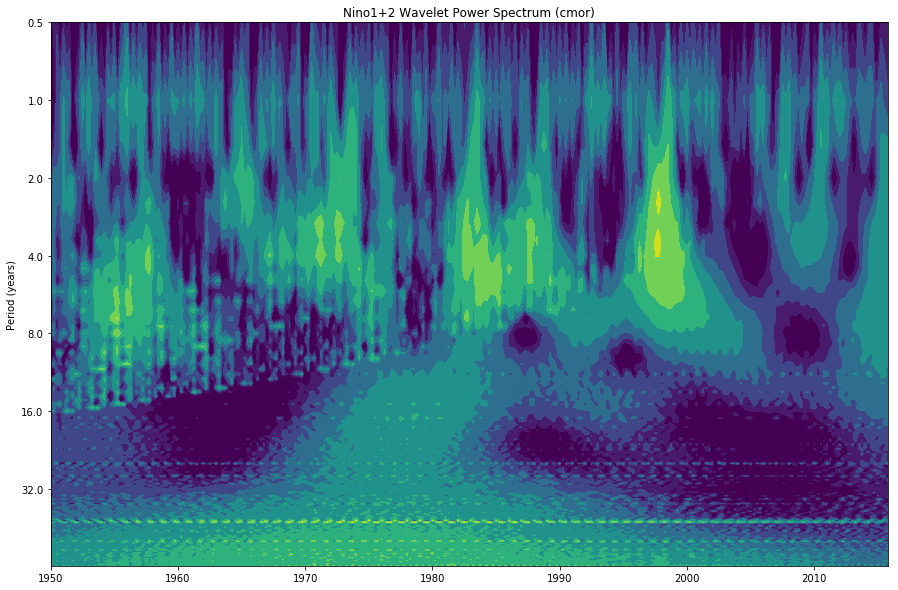

In [16]:
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels), extend="both")
ax.set_title("%s Wavelet Power Spectrum (%s)" % ("Nino1+2", wavelet))
ax.set_ylabel("Period (years)")
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)
plt.show()
plt.close()

# 参考資料

- https://github.com/PyWavelets/pywt/blob/master/demo/cwt_analysis.py

# 予備考察：ウェーブレットパワースペクトルの最大値や平均値の推移を遡及する

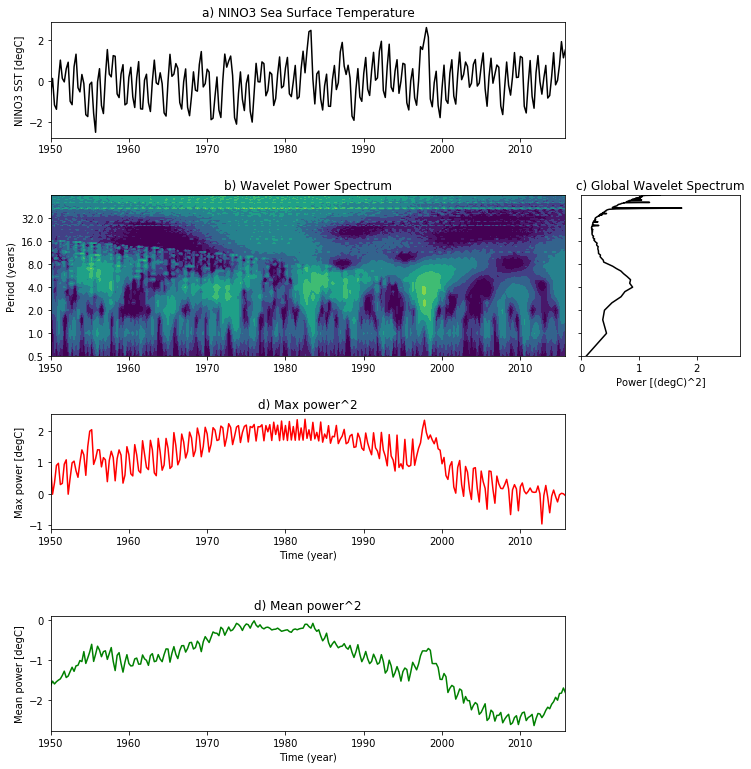

In [28]:
title = 'NINO3 Sea Surface Temperature'
label = 'NINO3 SST'
units = 'degC'

t = time
dat = sst
glbl_power = power.mean(axis=1)
std = dat.std()
var = std ** 2



# Prepare the figure
plt.close('all')
plt.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = plt.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = plt.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = plt.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
#bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
#           extent=extent)
'''
bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
'''
bx.set_title('b) Wavelet Power Spectrum')
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = plt.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
#cx.plot(glbl_signif, np.log2(period), 'k--')
#cx.plot(var * fft_theor, np.log2(period), '--', color='#cccccc')
#cx.plot(var * fft_power, np.log2(1./fftfreqs), '-', color='#cccccc',
#        linewidth=1.)
cx.plot(var * glbl_power, np.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(np.log2([period.min(), period.max()]))
cx.set_yticks(np.log2(Yticks))
cx.set_yticklabels(Yticks)
plt.setp(cx.get_yticklabels(), visible=False)

ex = plt.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
ex.plot(t, np.log2(power.max(axis=0)), 'red', linewidth=1.5)
ex.set_title('d) Max power^2')
ex.set_xlabel('Time (year)')
ex.set_ylabel(r'Max power [{}]'.format(units))
ex.set_xlim([t.min(), t.max()])

fx = plt.axes([0.1, 0.07 - 0.35, 0.65, 0.2], sharex=ax)
fx.plot(t, np.log2(power.mean(axis=0)), 'green', linewidth=1.5)
fx.set_title('d) Mean power^2')
fx.set_xlabel('Time (year)')
fx.set_ylabel(r'Mean power [{}]'.format(units))
fx.set_xlim([t.min(), t.max()])

plt.show()

- [PyCWT](../PyCWT/try_pycwt.ipynb)のライブラリで行なった場合と異なり、有意性の算出などの処理を省いているため、結果的に出力されている分布も異なっている。